# Laboratory 2.3: Linear Regression

In this practice you will build your own Linear Regression model. As you _should_ remember, we have seen in class how to obtain the optimal values for the parameters in a linear regression model. If you need to refresh your memory, check the slides from theory for the formula for the model optimization.

For the final part of this practice you will also need the following dataset:
- **winequality.csv**: Dataset with several input variables and a continuous output variable to determine wine quality. You can get more information from the [original repository](https://archive.ics.uci.edu/dataset/186/wine+quality).


In addition, we will be using the following libraries:
- Data management:
    - [numpy](https://numpy.org/)
    - [pandas](https://pandas.pydata.org/)
- Modelling:
    - [scikit-learn](https://scikit-learn.org)
- Plotting:
    - [seaborn](https://seaborn.pydata.org/)
    - [matplotlib](https://matplotlib.org/)

In [63]:
# Import here whatever you may need
import numpy as np
import sys
import os

# Get the absolute path of the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add it to sys.path
sys.path.insert(0, project_root)

from src.lab_2_3_LinearRegression import LinearRegressor, evaluate_regression, sklearn_comparison, anscombe_quartet

In [64]:
# Define data to use in this practice
x = np.array([0, 3, 2, 1, 4, 6, 7, 8, 9, 10])
y = np.array([2, 3, 2, 4, 5, 7, 9, 9, 10, 13])

In [65]:
### Train your linear regression model
linreg = LinearRegressor()
linreg.fit_simple(x, y)  # le estamos pasando vectores de una sola dimensión (por eso fit_simple)

In [66]:
# Obtain regression performance metrics
y_pred = linreg.predict(x)
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)

{'R2': 0.9201359388275275, 'RMSE': 1.0126472956832235, 'MAE': 0.894545454545455}


### Scikit-Learn comparison

In [67]:
### Compare your model with sklearn linear regression model
sklearn_comparison(x, y, linreg)


Custom Model Coefficient: 1.0363636363636364
Custom Model Intercept: 1.2181818181818187
Scikit-Learn Coefficient: 1.036363636363637
Scikit-Learn Intercept: 1.2181818181818151


{'custom_coefficient': 1.0363636363636364,
 'custom_intercept': 1.2181818181818187,
 'sklearn_coefficient': 1.036363636363637,
 'sklearn_intercept': 1.2181818181818151}

### Anscombe's quartet

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

anscombe, datasets, models, result = anscombe_quartet()

Dataset I: Coefficient: 0.500090909090911, Intercept: 3.0000909090908934
R2: 0.6665424595087749, RMSE: 1.1185497916336298, MAE: 0.837404958677687
Dataset II: Coefficient: 0.500000000000001, Intercept: 3.000909090909081
R2: 0.6662420337274843, RMSE: 1.1191023557497448, MAE: 0.9679338842975211
Dataset III: Coefficient: 0.49972727272727197, Intercept: 3.002454545454552
R2: 0.6663240410665592, RMSE: 1.118285693623049, MAE: 0.7159669421487593
Dataset IV: Coefficient: 0.49990909090909097, Intercept: 3.0017272727272735
R2: 0.6667072568984653, RMSE: 1.1177286221293936, MAE: 0.902727272727273


**Questions:** What do you think about the fit? Do you notice something? Comment it here below:



**Answer:** Como hemos visto en clase, el Cuarteto de Anscombe consta de cuatro datasets diseñados para tener propiedades estadísticas similares (como media, varianza, y coeficientes de regresión) pero patrones visuales muy diferentes, resaltando la importancia de graficar los datos.

Se puede apreciar que tras el ajuste, los 4 datasets tienen parámetros muy parecidos, aunque no iguales del todo. En concreto el coeficiente "w" tiene un valor próximo a 0.5, mientras que el intercept o término independiente "b" tiene un valor cercano a 3. 

Además, los valores de R2 y RMSE son bastante similares también entre los 4 conjuntos de datos, siendo sus valores aproximadamente 0.66 y 1.11 respectivamente.

Sin embargo, en el caso del MAE, el valor de cada dataset es ligeramente distinto y la diferencia se aprecia más que con el resto de métricas que hemos comentado. Para los datasets 1,2,3 y 4 observamos valores de aproximadamente 0.84, 0.97, 0.72 y 0.90 respectivamente. 

Podemos destacar que el MAE es más sensible a diferencias absolutas que otras métricas como el RMSE, y que el parámetro R2 no necesariamente refleja si el modelo es apropiado y se ha hecho bien el ajuste, especialmente en presencia de outliers o relaciones no lineales, como es el caso en el Cuarteto de Anscombe.


Once all models are trained (one for each dataset), we will plot the results of the fit alongside each point set

In [69]:
# print(datasets) # ['I' 'II' 'III' 'IV']
# print(anscombe)  # dataframe con identificador en la columna "dataset" para diferenciar entre los 4 conjuntos
print(models['I'])
# print(result)  # estadísticas sobre R2, RMSE, MAE

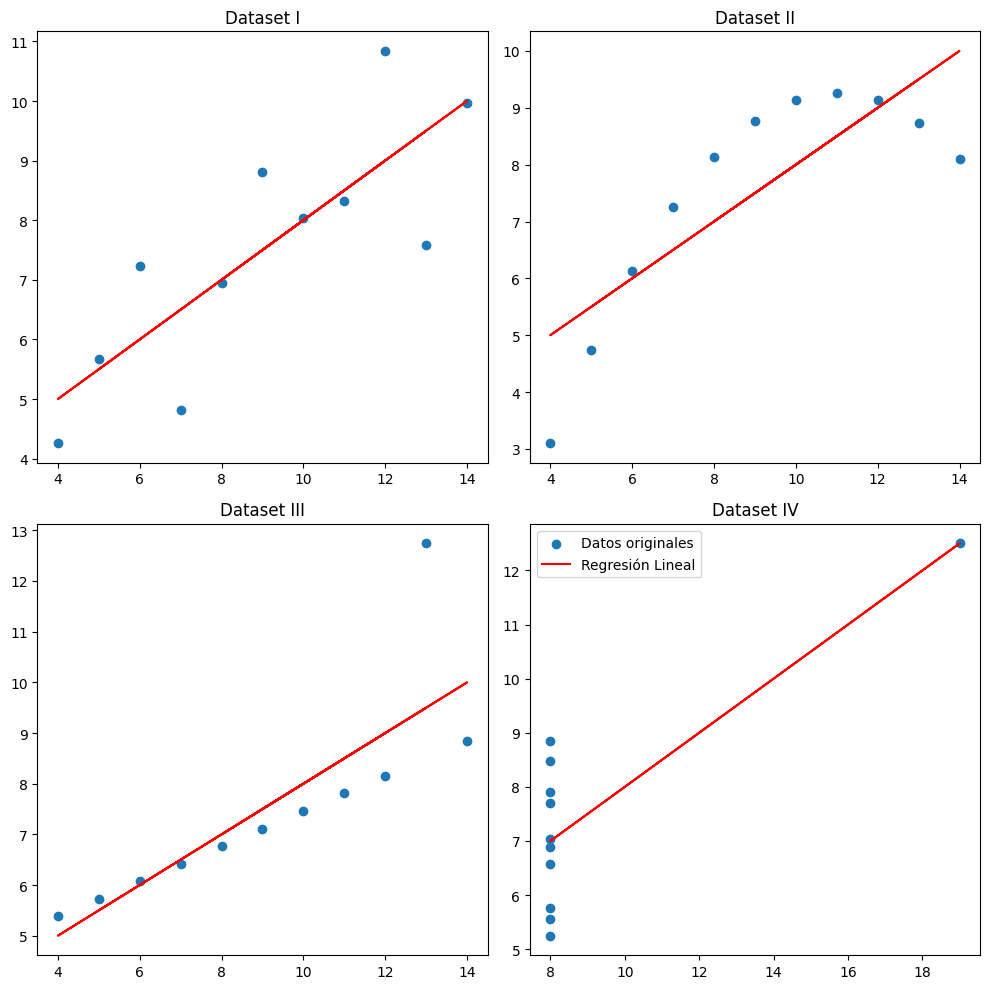

In [70]:
# Visualizing the datasets with their regression lines
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()

for i, dataset in enumerate(datasets):

    # TODO: Select the dataset for each case
    data = anscombe.loc[anscombe["dataset"] == dataset]
    axs[i].scatter(data['x'], data['y'], label ="Datos originales")

    # TODO: Plot the data and the fit (fill the "None" value)
    predicciones = models[dataset].predict(data["x"])
    axs[i].plot(data['x'], predicciones, color='red', label="Regresión Lineal")  # Regression line
    axs[i].set_title(f"Dataset {dataset}")

plt.tight_layout()
plt.legend()
plt.show()


### Multiple variable linear regression

In this section, we are going to use the dataset of the quality of red wines based on chemical measurements. The original dataset can be found in the [UCI Repository](https://archive.ics.uci.edu/dataset/186/wine+quality).

In [71]:
import pandas as pd

wine_data = pd.read_csv("data/winequality.csv", sep=';')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [72]:
wine_data.isna().value_counts()  # miramos si hay algún valor faltante

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH     sulphates  alcohol  quality
False          False             False        False           False      False                False                 False    False  False      False    False      1599
Name: count, dtype: int64

In [ ]:
# Divide dataset between inputs and output
inputs = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
output = 'quality'

X = wine_data[inputs]
y = wine_data[output]

In [79]:
#print(f"X: {X}")
#print(type(X))  # es un dataframe de pandas
#print(f"Y: {y}")
#print(type(y))  # es una serie de pandas


In [74]:
# Train multiple regression model
linreg_multiple = LinearRegressor()
linreg_multiple.fit_multiple(X, y)

In [75]:
# Obtain regression performance metrics
y_pred = linreg_multiple.predict(X)
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)

{'R2': 0.3605517030386882, 'RMSE': 0.6455750670692045, 'MAE': 0.5004899635951578}


In [88]:
print(f"Predicciones de Y: \n{y_pred}")
print(type(y))  # es una serie de pandas

Predicciones de Y: 
0       5.032850
1       5.137880
2       5.209895
3       5.693858
4       5.032850
          ...   
1594    5.529771
1595    5.961613
1596    5.943043
1597    5.470756
1598    6.008196
Length: 1599, dtype: float64
<class 'pandas.core.series.Series'>


In [90]:
print(abs(y-y_pred).sort_values(ascending = False))

832     2.689107
652     2.474653
1276    2.327958
1505    2.223015
899     2.137879
          ...   
527     0.003116
1358    0.002910
1589    0.002056
472     0.001186
711     0.000730
Length: 1599, dtype: float64
